In [1]:
# ==============================================
# COMMON IMPORTS (Run this cell first)
# ==============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
import os
import zipfile
import requests
import io

# Set random seeds for reproducibility (optional)
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

/Users/aditya/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


TensorFlow Version: 2.19.0
Keras Version: 3.9.2



--- Assignment 6: RNN-Based Sentiment Analysis (LSTM) ---
Loading IMDB dataset...
Preprocessing IMDB data (padding sequences)...
x_train_imdb_rnn shape: (25000, 200)
Building LSTM model for sentiment analysis...


/Users/aditya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "imdb_classifier_lstm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer (LSTM)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_sigmoid (Dense)          │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Compiling LSTM model...
Training LSTM model...
Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 560ms/step - accuracy: 0.5816 - loss: 0.6837 - val_accuracy: 0.7590 - val_loss: 0.5748
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 579ms/step - accuracy: 0.7835 - loss: 0.5062 - val_accuracy: 0.8162 - val_loss: 0.4111
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 560ms/step - accuracy: 0.8459 - loss: 0.3696 - val_accuracy: 0.8200 - val_loss: 0.4014
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.8705 - loss: 0.3263 - val_accuracy: 0.8390 - val_loss: 0.3755
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8867 - loss: 0.2962 - val_accuracy: 0.8364 - val_loss: 0.3851
Evaluating LSTM model...
Test Loss: 0.3824
Test Accuracy: 0.8390


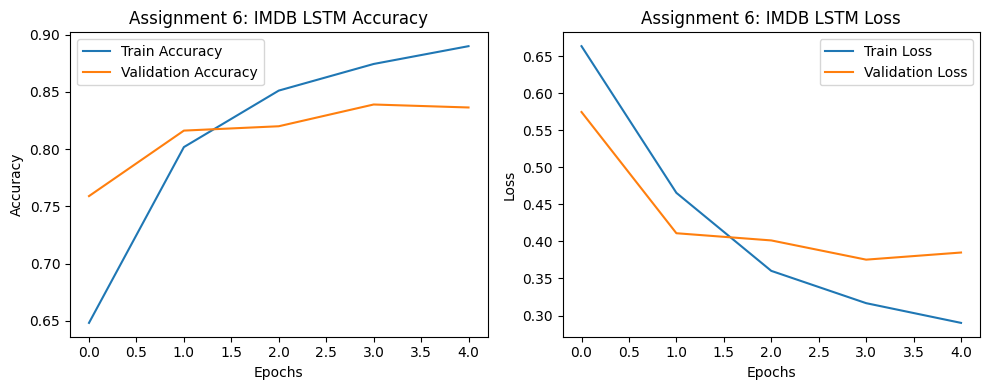


--- Predicting sentiment for new reviews (example) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step

Review: "This movie was fantastic! The acting was superb and the plot was gripping."
Predicted Sentiment: Positive (Score: 0.637)

Review: "A complete waste of time. The story was predictable and the characters were dull."
Predicted Sentiment: Negative (Score: 0.025)

Review: "It was okay, not great but not terrible either. Some good moments."
Predicted Sentiment: Negative (Score: 0.079)

Review: "Absolutely brilliant, a masterpiece of cinema!"
Predicted Sentiment: Negative (Score: 0.274)


In [4]:
# ==============================================
# Assignment 6: RNN-Based Sentiment Analysis (LSTM)
# ==============================================
print("\n--- Assignment 6: RNN-Based Sentiment Analysis (LSTM) ---")

# --- 1. Load and Prepare the IMDB Dataset ---
print("Loading IMDB dataset...")
# Reuse parameters from Assignment 3
max_features = 10000
maxlen = 200
(x_train_imdb_rnn, y_train_imdb_rnn), (x_test_imdb_rnn, y_test_imdb_rnn) = keras.datasets.imdb.load_data(num_words=max_features)

# --- 2. Preprocess Data ---
print("Preprocessing IMDB data (padding sequences)...")
x_train_imdb_rnn = keras.preprocessing.sequence.pad_sequences(x_train_imdb_rnn, maxlen=maxlen)
x_test_imdb_rnn = keras.preprocessing.sequence.pad_sequences(x_test_imdb_rnn, maxlen=maxlen)

print(f"x_train_imdb_rnn shape: {x_train_imdb_rnn.shape}")

# --- 3. Define the RNN Model (Embedding + LSTM) ---
print("Building LSTM model for sentiment analysis...")
# Reuse embedding_dim from Assignment 3 if desired
embedding_dim = 32

model_imdb_lstm = keras.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen, name="embedding"),
    # Use LSTM layer
    layers.LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, name="lstm_layer"), # You can also try GRU
    # layers.GRU(units=64, dropout=0.2, recurrent_dropout=0.2, name="gru_layer"), # Alternative
    layers.Dense(1, activation='sigmoid', name="output_sigmoid") # Binary classification
], name="imdb_classifier_lstm")

model_imdb_lstm.summary()

# --- 4. Compile the Model ---
print("Compiling LSTM model...")
model_imdb_lstm.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

# --- 5. Train the Model ---
print("Training LSTM model...")
# Reuse parameters from Assignment 3
epochs_imdb = 5
batch_size_imdb = 512
history_imdb_lstm = model_imdb_lstm.fit(x_train_imdb_rnn, y_train_imdb_rnn,
                                        epochs=epochs_imdb, # Use same epochs as Assign 3 for comparison (or increase)
                                        batch_size=batch_size_imdb,
                                        validation_split=0.2,
                                        verbose=1)

# --- 6. Evaluate the Model ---
print("Evaluating LSTM model...")
loss_imdb_lstm, accuracy_imdb_lstm = model_imdb_lstm.evaluate(x_test_imdb_rnn, y_test_imdb_rnn, verbose=0)
print(f"Test Loss: {loss_imdb_lstm:.4f}")
print(f"Test Accuracy: {accuracy_imdb_lstm:.4f}")

# --- Plot training history (Optional) ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_imdb_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_imdb_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Assignment 6: IMDB LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_imdb_lstm.history['loss'], label='Train Loss')
plt.plot(history_imdb_lstm.history['val_loss'], label='Validation Loss')
plt.title('Assignment 6: IMDB LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# --- Make Predictions on New Text (Example) ---
print("\n--- Predicting sentiment for new reviews (example) ---")

# Example reviews
new_reviews = [
    "This movie was fantastic! The acting was superb and the plot was gripping.",
    "A complete waste of time. The story was predictable and the characters were dull.",
    "It was okay, not great but not terrible either. Some good moments.",
    "Absolutely brilliant, a masterpiece of cinema!"
]

# Reuse word_index from Assignment 3 if available, otherwise reload
if 'word_index' not in locals():
     word_index = keras.datasets.imdb.get_word_index()

# Preprocess new reviews
def preprocess_texts(texts, word_index, maxlen, max_features):
    sequences = []
    for text in texts:
        words = keras.preprocessing.text.text_to_word_sequence(text)
        # Encode words, handle unknown words (use index 2)
        encoded = [word_index.get(word, 2) + 3 for word in words] # Add 3 for reserved indices
        # Filter based on max_features (keep words with index < max_features)
        filtered_encoded = [index for index in encoded if index < max_features]
        sequences.append(filtered_encoded)
    return keras.preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)

new_sequences = preprocess_texts(new_reviews, word_index, maxlen, max_features)

# Make predictions
new_predictions = model_imdb_lstm.predict(new_sequences)

# Display results
for i, review in enumerate(new_reviews):
    sentiment = "Positive" if new_predictions[i][0] > 0.5 else "Negative"
    print(f"\nReview: \"{review}\"")
    print(f"Predicted Sentiment: {sentiment} (Score: {new_predictions[i][0]:.3f})")